In [3]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })
     

# Exe 1

In [4]:
x4 = np.linspace(-4,4,400)
pdf4 = stats.norm.pdf(x4)

# normalize by dx
pdf4N = pdf4*(x4[1]-x4[0])

# print sums
print(f'Sum over pdf: {np.sum(pdf4):.3f}')
print(f'Sum over normalized pdf: {np.sum(pdf4N):.3f}')

Sum over pdf: 49.872
Sum over normalized pdf: 1.000


# Exe 2

In [5]:
# with a restricted range
x2 = np.linspace(-2,2,300)
pdf2 = stats.norm.pdf(x2)

# normalize by dx
pdf2N = pdf2*(x2[1]-x2[0])

# normalize to sum=1 ("U" is for "unit")
pdf2U = pdf2 / np.sum(pdf2)

# print sums
print(f'Sum over pdf normalized by dx : {np.sum(pdf2N):.3f}')
print(f'Sum over pdf normalized by sum: {np.sum(pdf2U):.3f}')

Sum over pdf normalized by dx : 0.955
Sum over pdf normalized by sum: 1.000


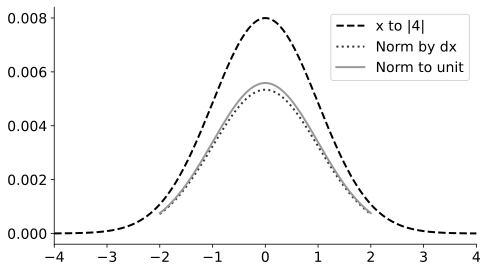

In [6]:
# plot
plt.figure(figsize=(7,4))
plt.plot(x4,pdf4N,'k--',linewidth=2,label='x to |4|')
plt.plot(x2,pdf2N,':',color=(.2,.2,.2,),linewidth=2,label='Norm by dx')
plt.plot(x2,pdf2U,color=(.6,.6,.6),linewidth=2,label='Norm to unit')
plt.xlim(x4[[0,-1]])
plt.legend()

# display
plt.tight_layout()
plt.show()
     


In [7]:
print(f'Sum over normalized pdf: {np.sum(pdf4N):.9f}')

Sum over normalized pdf: 0.999939305


# Exe 3

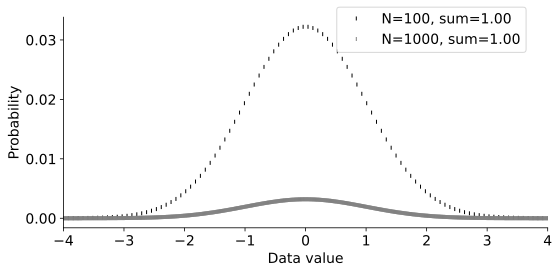

In [8]:
npnts = [100,1000]
colors = ['k','gray']


plt.figure(figsize=(8,4))

# the loop that does it all
for resolution,linecolor in zip(npnts,colors):

  # create x-axis grid
  x = np.linspace(-4,4,resolution)

  # evaluate "raw" pdf
  pdf = stats.norm.pdf(x)

  # normalize by dx
  pdfN = pdf*(x[1]-x[0])

  # plot the normalized pdf
  plt.plot(x,pdfN,'|',linewidth=2,color=linecolor,markersize=4,
           label=f'N={resolution}, sum={np.sum(pdfN):.2f}')


plt.xlim(x[[0,-1]])
plt.legend(bbox_to_anchor=[.55,.8])
plt.xlabel('Data value')
plt.ylabel('Probability')

# display the figure
plt.tight_layout()
plt.show()
     

# Exe 4

In [9]:
# create cdf from pdf
x = np.linspace(-4,4,300)
pdf = stats.norm.pdf(x)

# python's cdf
cdf_sp = stats.norm.cdf(x)

# manual computation
cdf_my = np.cumsum(pdf)

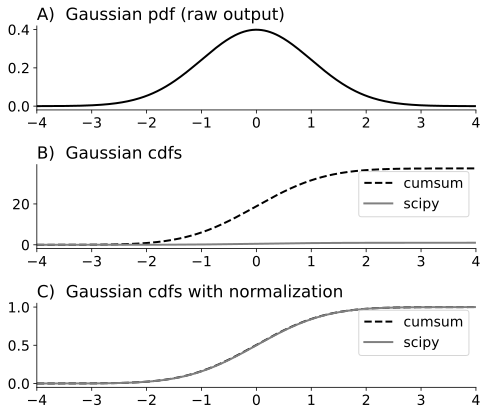

In [10]:
# plot
_,axs = plt.subplots(3,1,figsize=(7,6))

axs[0].plot(x,pdf,'k',linewidth=2)
axs[0].set(xlim=x[[0,-1]])
axs[0].set_title(r'A)  Gaussian pdf (raw output)')


axs[1].plot(x,cdf_my,'k--',linewidth=2,label='cumsum')
axs[1].plot(x,cdf_sp,color='gray',linewidth=2,label='scipy')
axs[1].set(xlim=x[[0,-1]])
axs[1].set_title(r"B)  Gaussian cdfs")
axs[1].legend()


# normalized by dx
cdf_myN = np.cumsum(pdf) * (x[1]-x[0])

axs[2].plot(x,cdf_myN,'k--',linewidth=2,label='cumsum')
axs[2].plot(x,cdf_sp,color='gray',linewidth=2,label='scipy')
axs[2].set(xlim=x[[0,-1]])
axs[2].set_title(r"C)  Gaussian cdfs with normalization")
axs[2].legend()


# display the figure
plt.tight_layout()
plt.show()

# Exe 5

In [11]:
# cdfs with different resolutions
x = np.linspace(-4,4,5000)
pdf = stats.norm.pdf(x)

# python's cdf
cdf_sp = stats.norm.cdf(x)

# manual computation (normalized)
cdf_my = np.cumsum(pdf) * (x[1]-x[0])

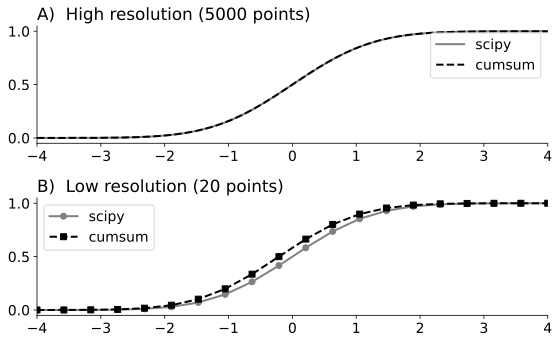

In [12]:
# plot
_,axs = plt.subplots(2,1,figsize=(8,5))

axs[0].plot(x,cdf_sp,color='gray',linewidth=2,label='scipy')
axs[0].plot(x,cdf_my,'k--',linewidth=2,label='cumsum')
axs[0].set(xlim=x[[0,-1]])
axs[0].set_title(r"A)  High resolution (5000 points)")
axs[0].legend()



x = np.linspace(-4,4,20)
cdf_sp = stats.norm.cdf(x)
cdf_my = np.cumsum(stats.norm.pdf(x)) * (x[1]-x[0])

axs[1].plot(x,cdf_sp,'o-',color='gray',linewidth=2,label='scipy')
axs[1].plot(x,cdf_my,'ks--',linewidth=2,label='cumsum')
axs[1].set(xlim=x[[0,-1]])
axs[1].set_title(r"B)  Low resolution (20 points)")
axs[1].legend()

# display the figure
plt.tight_layout()
plt.show()

# Exe 6

In [13]:
# the non-standard pdf
x = np.linspace(-6,6,1001)
pdf = stats.norm.pdf(x-2.7) + stats.norm.pdf(x+2.7)

# simple scaling by dx
cdf = np.cumsum(pdf) * np.mean(np.diff(x))

# better scaling by first unit-sum-normalizing pdf
pdfN = pdf / np.sum(pdf)
cdfN = np.cumsum(pdfN)

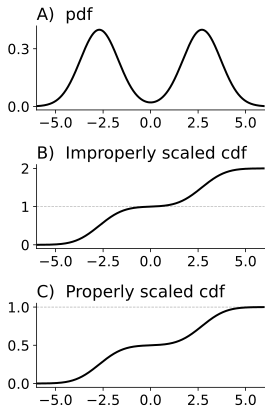

In [14]:
# plot
axs = plt.subplots(3,1,figsize=(4,6))[1]

axs[0].plot(x,pdf,'k',linewidth=2)
axs[0].set(yticks=[0,.3])
axs[0].set_title(r'A)  pdf')

axs[1].plot(x,cdf,'k',linewidth=2)
axs[1].axhline(1,color=[.7,.7,.7],linewidth=.7,linestyle='--',zorder=-1)
axs[1].set_title(r'B)  Improperly scaled cdf')

axs[2].plot(x,cdfN,'k',linewidth=2)
axs[2].axhline(1,color=[.7,.7,.7],linewidth=.7,linestyle='--',zorder=-1)
axs[2].set_title(r'C)  Properly scaled cdf')



for a in axs:
  a.set(xlim=x[[0,-1]])

# display the figure
plt.tight_layout()
plt.show()

# Exe 7

In [15]:
# create a cdf
x = np.linspace(0,10,200)
cdf = stats.lognorm.cdf(x,1,1/2)

# empirical pdf via difference (D=difference)
pdfD = np.diff(cdf)

# analytical pdf (A=analytical)
pdfA = stats.lognorm.pdf(x,1,1/2)
pdfA *= x[1]-x[0]


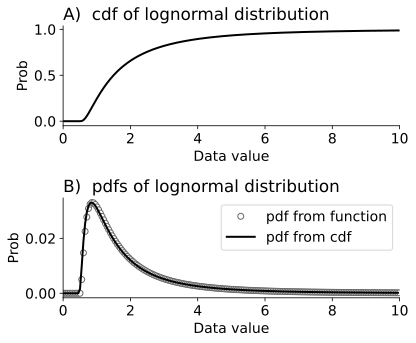

In [16]:
# plot
_,axs = plt.subplots(2,1,figsize=(6,5))


axs[0].plot(x,cdf,'k',linewidth=2)
axs[0].set_title(r'A)  cdf of lognormal distribution')

axs[1].plot(x,pdfA,'o',color=(.4,.4,.4),markerfacecolor='w',
            linewidth=2,label='pdf from function')
axs[1].plot(x[:-1],pdfD,'k',linewidth=2,label='pdf from cdf')
axs[1].set_title(r'B)  pdfs of lognormal distribution')
axs[1].legend()

for a in axs:
  a.set(xlim=x[[0,-1]],xlabel='Data value',ylabel='Prob')

# display the figure
plt.tight_layout()
plt.show()

# Exe 8

In [17]:
# colored marble counts
blue   = 40
yellow = 30
orange = 20
totalMarbs = blue + yellow + orange

# put them all in a jar
jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange)))

# draw 500 marbles (with replacement)
numDraws = 500
marbSample = np.zeros(numDraws)

In [18]:
# experiment
marbSample = np.random.choice(jar,size=numDraws,replace=True)


In [19]:
# the proportion of colors drawn
propBlue = sum(marbSample==1) / numDraws
propYell = sum(marbSample==2) / numDraws
propOran = sum(marbSample==3) / numDraws

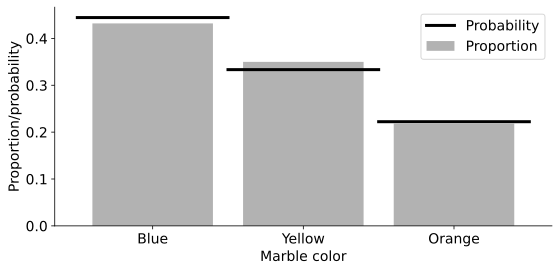

In [20]:
# plot those against the theoretical probability
plt.figure(figsize=(8,4))

plt.bar([1,2,3],[ propBlue, propYell, propOran ],label='Proportion',color=(.7,.7,.7))
plt.plot([0.5, 1.5],[blue/totalMarbs, blue/totalMarbs],'k',linewidth=3,label='Probability')
plt.plot([1.5, 2.5],[yellow/totalMarbs,yellow/totalMarbs],'k',linewidth=3)
plt.plot([2.5, 3.5],[orange/totalMarbs,orange/totalMarbs],'k',linewidth=3)

plt.xticks([1,2,3],labels=('Blue','Yellow','Orange'))
plt.xlabel('Marble color')
plt.ylabel('Proportion/probability')
plt.legend()

# display the figure
plt.tight_layout()
plt.show()

# Exe 9

In [21]:
# colored marble counts
blue   = 40
yellow = 30
orange = 20
totalMarbs = blue + yellow + orange

In [22]:
# range of sample sizes
sampleSizes = np.arange(20,2001,step=10)

# some initializations 
empiProbs = np.zeros(3)
trueProbs = np.array([ blue/totalMarbs,yellow/totalMarbs,orange/totalMarbs ])

# initialize
rms = np.zeros(len(sampleSizes))


# run the experiment
for idx,thisN in enumerate(sampleSizes):

  # draw N marbles
  drawColors = np.random.choice(jar,size=thisN,replace=True)

  # compute proportion
  for ei in range(3):
    empiProbs[ei] = np.sum(drawColors==(ei+1)) / thisN

  # compute the sum of squared errors
  rms[idx] = np.sqrt( np.mean( (empiProbs-trueProbs)**2 ) )

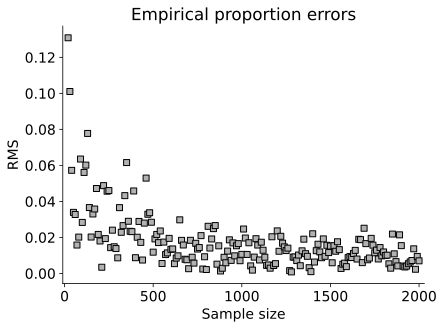

In [23]:
# plot
plt.plot(sampleSizes,rms,'ks',markerfacecolor=[.7,.7,.7])
plt.xlim([sampleSizes[0]-30,sampleSizes[-1]+30])
plt.xlabel('Sample size')
plt.ylabel('RMS')
plt.title('Empirical proportion errors',loc='center')

# display the figure
plt.tight_layout()
plt.show()